# Notebook 2 : Exploration des données

L'objectif de ce notebook est d'extraire des informations à l'aide de visualisations sur les données fournies, afin de mieux comprendre les données et de pouvoir les exploiter pour la suite du projet.

In [ ]:
import pandas as pd

cocktails_df = pd.read_csv('../data/cocktails.csv')

def update_empty_about(row):
    if pd.isna(row['about']):
        return ''
    else:
        return row['about']

cocktails_df['about'] = cocktails_df.apply(update_empty_about, axis=1)

## Répartition des cocktails avec / sans alcool

On commence par regarder la répartition des cocktails avec et sans alcool, et pour cela nous allons vérifier si le terme "Sans Alcool" est mentionné dans une des colonnes 'name', 'description' ou 'tags'.

In [12]:
def has_alcool(row):
    if 'sans alcool' in row['name'].lower() or 'sans alcool' in row['description'].lower() or 'sans alcool' in row['tags'].lower():
        return False
    else:
        return True

cocktails_df['has_alcool'] = cocktails_df.apply(has_alcool, axis=1)

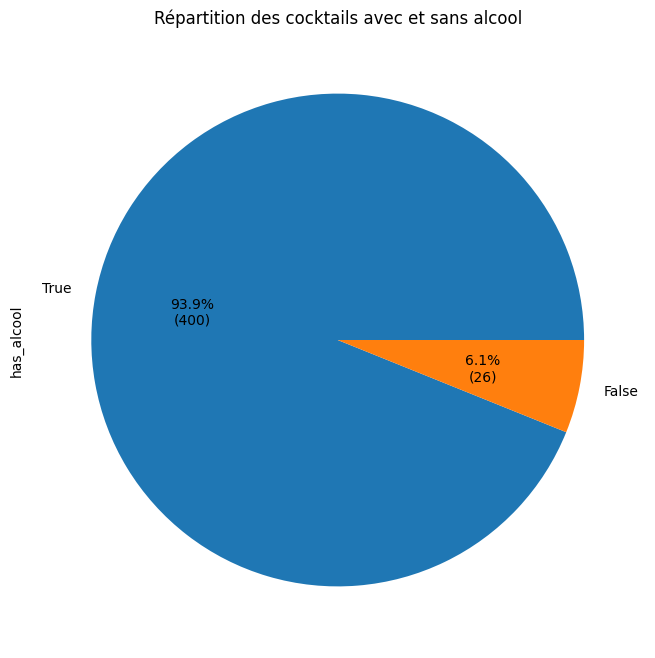

In [ ]:
import matplotlib.pyplot as plt

def my_autopct(x):
    return '{:.1f}%\n({:.0f})'.format(x, len(cocktails_df)*x/100)

plt.figure(figsize=(8, 8))
cocktails_df['has_alcool'].value_counts().plot.pie(autopct=my_autopct)
plt.title('Répartition des cocktails avec et sans alcool')
plt.show()

## Tags les plus présents

Pour déterminer les tags les plus présents, on va compter le nombre de fois que chaque tag est mentionné dans la colonne 'tags'.

In [43]:
from collections import defaultdict

tags = defaultdict(int)

for tags_list in cocktails_df['tags']:
    for tag in tags_list.split('; '):
        tags[tag] += 1
        
tags = dict(sorted(tags.items(), key=lambda x: x[1], reverse=True)[:30])
print(tags)

{'Direct au verre': 179, 'Au shaker': 177, 'Jus de citron': 152, 'Cocktail classique': 94, 'Vodka': 74, 'Sirop de sucre': 72, 'Gin': 71, 'Jus d’orange': 70, 'Rhum': 58, 'Sirop de grenadine': 47, 'Whisky': 41, 'Jus d’ananas': 38, 'Brandy': 37, 'Au verre à mélange': 34, 'Angostura bitters': 32, 'Tequila': 31, 'Vermouth rouge': 29, 'Eau gazeuse': 26, 'Triple sec (Cointreau)': 25, 'Crème fraîche': 21, 'Rhum ambre': 21, 'Au blender': 20, 'Champagne': 19, 'Vermouth blanc (Martini)': 18, 'Menthe fraîche': 16, 'Limonade': 15, 'Liqueur d’amandes': 15, 'Curacao bleu': 13, 'Marasquin': 13, 'Curacao blanc': 13}


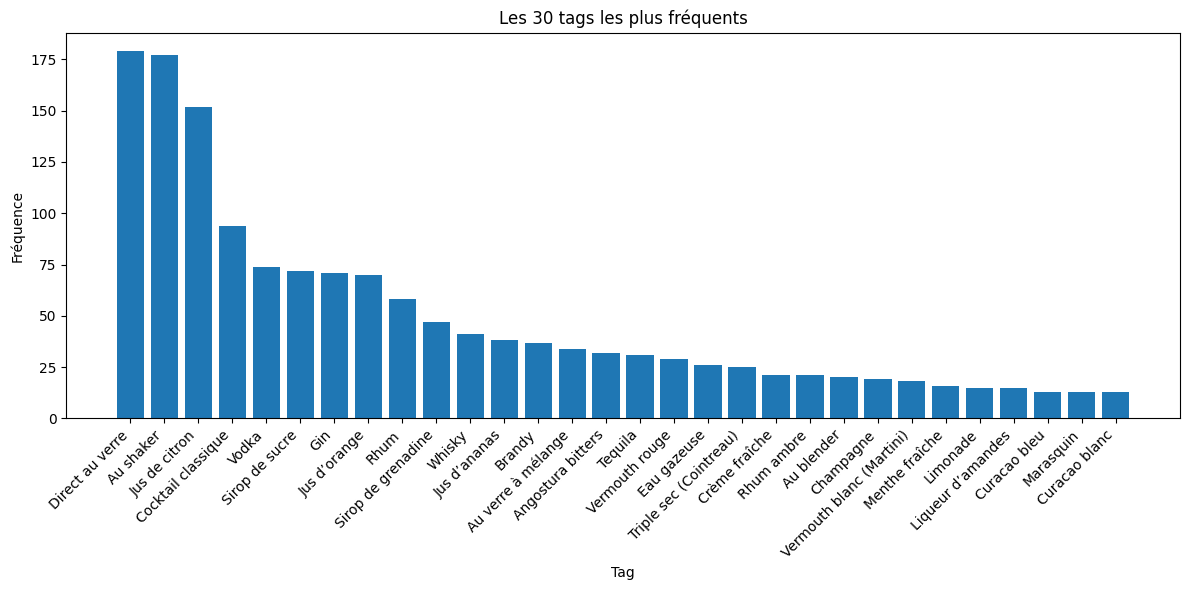

In [44]:
plt.figure(figsize=(12, 6)) 
plt.bar(range(len(tags)), list(tags.values()), align='center')
plt.xticks(range(len(tags)), list(tags.keys()), rotation=45, ha='right')
plt.title('Les 30 tags les plus fréquents')
plt.xlabel('Tag')
plt.ylabel('Fréquence')
plt.tight_layout() 
plt.show()

## Ingrédients les plus utilisés

De la même manière, on va compter le nombre de fois que chaque ingrédient est mentionné dans la colonne 'ingredients'.

In [42]:
from collections import defaultdict
import re

ingredients = defaultdict(int)

for ingredients_list in cocktails_df['ingredients']:
    for ingredient in ingredients_list.split('; '):
        if "d'" in ingredient:
            ingredient = ingredient.split("d'")[1]
        elif 'de ' in ingredient:
            ingredient = ingredient.split(' de ')[1]
        elif len(re.findall(r'\d+', ingredient)) > 0:
            ingredient = re.sub(r'\d+', '', ingredient)
        ingredients[ingredient] += 1
        
ingredients = dict(sorted(ingredients.items(), key=lambda x: x[1], reverse=True)[:30])
print(ingredients)

{'jus': 197, 'sirop': 143, 'vodka': 70, 'gin': 68, 'orange': 51, 'crème': 40, 'liqueur': 39, 'ananas': 39, 'tequila': 31, 'eau gazeuse': 27, 'Cointreau': 21, 'rhum': 21, 'rhum ambré': 18, 'Amaretto': 15, 'rhum blanc': 15, 'vermouth rouge (Martini...)': 15, 'Champagne': 14, 'Angostura bitters': 12, 'marasquin': 12, 'Angostura Bitters': 12, 'Curaçao Bleu': 11, 'vermouth rouge': 11, 'limonade': 10, 'orange pressée': 10, 'lait': 10, 'brandy (Cognac)': 10, 'sucre en poudre': 10, 'brandy (Cognac...)': 10, 'Baileys': 9, 'citron vert': 9}


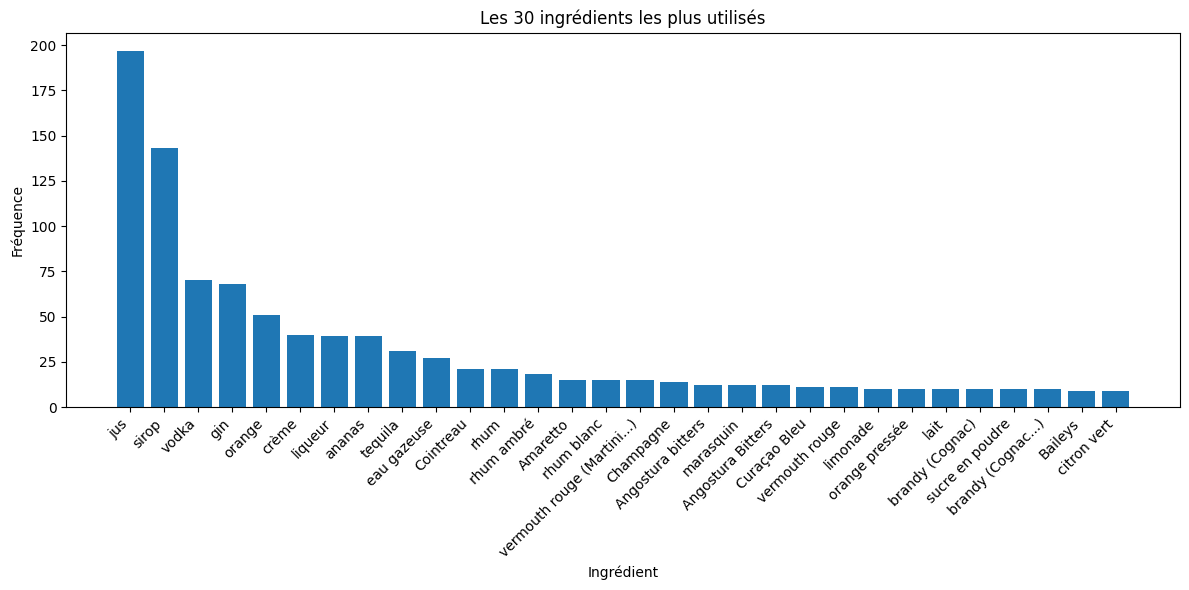

In [45]:
plt.figure(figsize=(12, 6)) 
plt.bar(range(len(ingredients)), list(ingredients.values()), align='center')
plt.xticks(range(len(ingredients)), list(ingredients.keys()), rotation=45, ha='right')
plt.title('Les 30 ingrédients les plus utilisés')
plt.xlabel('Ingrédient')
plt.ylabel('Fréquence')
plt.tight_layout() 
plt.show()

NB: Notre méthode de détection d'ingrédient n'est pas parfaite, car elle prends pas totalement en compte les "variantes" possibles d'un ingrédiant. Par exemple le 'citron vert' qui est 30ème devrait être beaucoup plus haut car il est très souvent utilisé pour des cocktails. Simplement dans la liste des ingrédients, il est souvent mentionné '1/2 citron' ou '1 citron' ce qui n'est pas pris en compte dans notre méthode.

## Pays et villes les plus cités

Pour cette partie, nous allons utiliser la librairie [locationtagger](https://pypi.org/project/locationtagger/) sur les colonnes 'name', 'description' et 'about' pour extraire les noms de pays et de villes.

In [80]:
import locationtagger

cities = defaultdict(int)
countries = defaultdict(int)

def detect_location(row):
    location_description = locationtagger.find_locations(text = row['description'] + ' ' + row['about'])

    detected_cities = list(set(city.capitalize() for city in location_description.cities))
    
    detected_countries = list(set(country.capitalize() for country in location_description.countries))

    for city in detected_cities:
        cities[city] += 1

    for country in detected_countries:
        countries[country] += 1

cocktails_df.apply(detect_location, axis=1)

0      None
1      None
2      None
3      None
4      None
       ... 
421    None
422    None
423    None
424    None
425    None
Length: 426, dtype: object

### Graphique sur les villes citées

In [82]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geocoder")

def geolocate(city):
    try:
        loc = geolocator.geocode(city)
        return (loc.latitude, loc.longitude)
    except:
        return (None, None)

df_cities = pd.DataFrame(cities.items(), columns=['city', 'count'])
df_cities[['latitude', 'longitude']] = df_cities['city'].apply(geolocate).apply(pd.Series)

print(df_cities.head(5))

        city  count   latitude   longitude
0      Miami      1  25.774173  -80.193620
1      Beach      3  46.918069 -104.004373
2  Margarita      6        NaN         NaN
3     Paloma      1  38.259361 -120.763269
4     Malibu      2  34.035591 -118.689423


Text(0.5, 1.0, 'Mentions des villes')

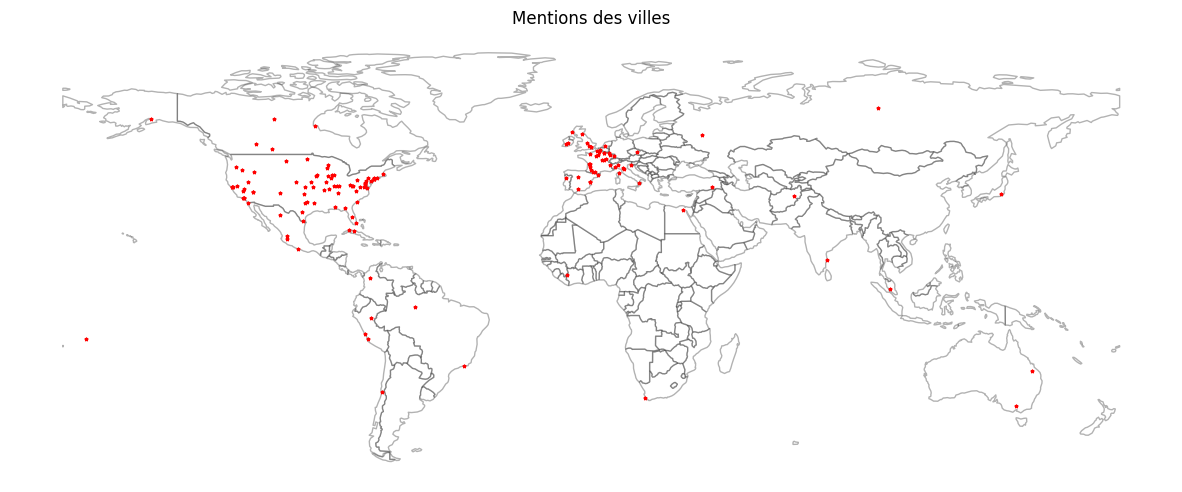

In [88]:
import geopandas as gpd
from shapely.geometry import Point

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)
world = world[world.SOVEREIGNT != "Antarctica"]

geometry = [Point(xy) for xy in zip(df_cities['longitude'], df_cities['latitude'])]
gdf_cities = gpd.GeoDataFrame(df_cities, geometry=geometry)

ax = world.plot(color='white', edgecolor='black', alpha=0.3, figsize=(15, 15))

gdf_cities.plot(ax=ax, markersize=5, marker='*', label="Cities", color='red')

ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

for edge in ['right','bottom','left','top']:
    ax.spines[edge].set_visible(False)

plt.title('Mentions des villes')

### Graphique sur les pays cités

In [89]:
import pycountry

df_countries = pd.DataFrame(countries.items(), columns=['country', 'count'])
df_countries['ISO_code'] = df_countries['country'].apply(lambda x: pycountry.countries.get(name=x).alpha_3 if pycountry.countries.get(name=x) else None)

print(df_countries.head(5))

      country  count ISO_code
0      Monaco      1      MCO
1      France      6      FRA
2        Cuba      5      CUB
3      Canada      1      CAN
4  Luxembourg      1      LUX


Text(0.5, 1.0, 'Pays les plus cités')

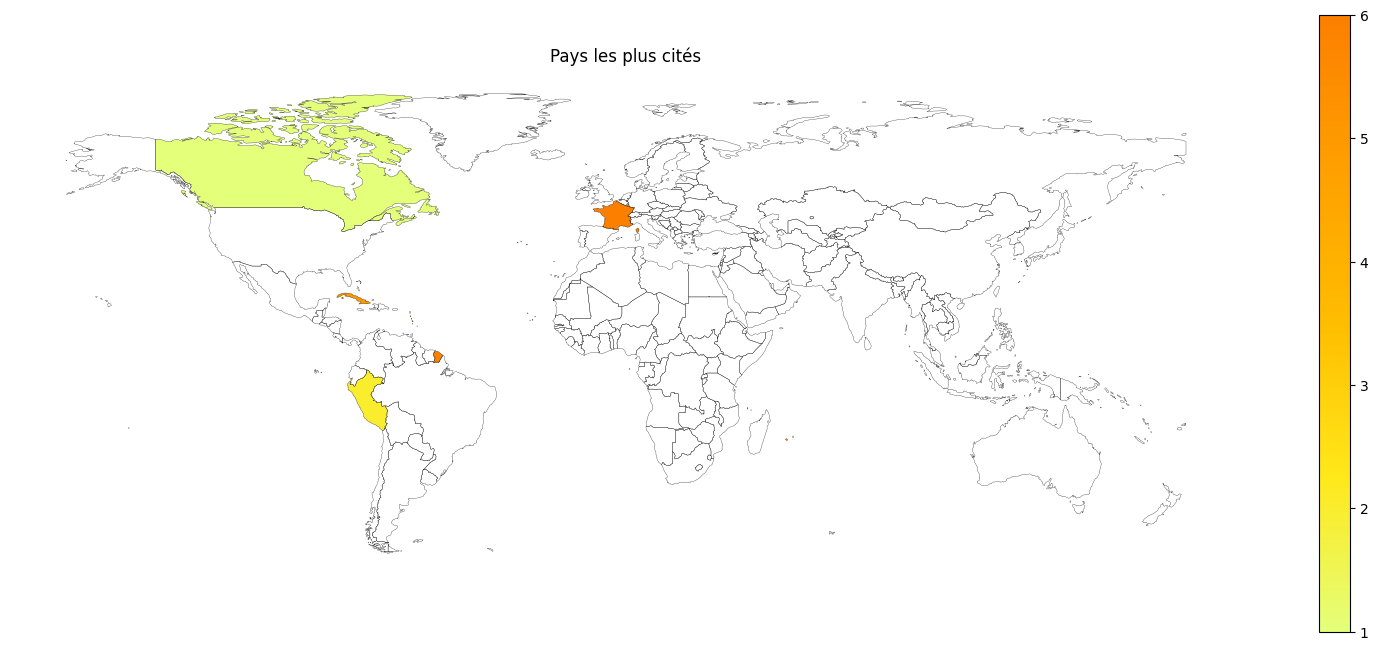

In [100]:
# Création d'une carte pour les pays
import geopandas as gpd

mapShape = gpd.read_file("geo/world.geojson")

mapShape = pd.merge(
    left = mapShape,
    right = df_countries,
    left_on = 'ISO_A3',
    right_on = 'ISO_code',
    how = 'left'
)

ax = mapShape.boundary.plot(edgecolor='black',linewidth=0.2,figsize=(20,15))
mapShape.plot(ax=ax,column="count",cmap='Wistia', legend=True, legend_kwds={"shrink":0.6,"orientation":"vertical"})

ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

for edge in ['right','bottom','left','top']:
    ax.spines[edge].set_visible(False)

plt.subplots_adjust(
    top=0.805,
    bottom=0.12,
    left=0.16,
    right=0.93,
    hspace=0.2,
    wspace=0.2  
)
plt.title('Pays les plus cités')